## Introduction

This report presents an unsupervised learning analysis of banking branch operational data. The
objective is to identify patterns among bank branches using Principal Component Analysis (PCA)
and K-Means clustering implemented purely with NumPy. The insights derived from this analysis
can help the bank optimize resource allocation and operational strategies.


## 1. Data Loading and Preprocessing
- Load dataset  
- Handle missing values  
- Feature scaling (standardization)

The dataset was loaded using Pandas and initially explored to understand its structure, data types,
and presence of missing values. Rows containing missing values were removed to ensure
accuracy. *Only numerical features were selected for analysis, as PCA and K-Means require
numerical input*. Feature scaling was performed using standardization to ensure that all variables
contribute equally to distance and variance calculations.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data_set = pd.read_csv('../../Maths-Stats-For-AI/assignment-1 (Ungraded)/bank.csv')
data_set.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [2]:
# Basic info
data_set.info()

<class 'pandas.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


In [3]:
# Handle missing values (if any)
data_set = data_set.dropna()

# Select numerical features only
data_set_numerical_only = data_set.select_dtypes(include=[np.number]).values
feature_names = data_set.select_dtypes(include=[np.number]).columns
data_set_numerical_only.shape

(515, 6)

In [4]:
# Feature Scaling (Standardization)
mean = data_set_numerical_only.mean(axis=0)
std = data_set_numerical_only.std(axis=0)

data_set_scaled = (data_set_numerical_only - mean) / std

## 2. Dimensionality Reduction using PCA
Principal Component Analysis was applied to reduce the dimensionality of the dataset. The
covariance matrix of the standardized data was computed, followed by eigenvalue and eigenvector
decomposition. Eigenvalues were sorted in descending order to identify the principal components
that capture the maximum variance. The first two principal components were selected as they retain
most of the original data variability while enabling 2D visualization.

In [5]:
# Covariance Matrix
cov_matrix = np.cov(data_set_scaled, rowvar=False)
cov_matrix.shape

(6, 6)

In [6]:
# Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

# Explained variance
explained_variance = eigen_values / np.sum(eigen_values)
explained_variance[:5]

array([0.31696344, 0.1993001 , 0.18320106, 0.15517677, 0.14019478])

In [7]:
# Project data onto first 2 principal components
W = eigen_vectors[:, :2]
data_set_scaled_pca = data_set_scaled @ W
data_set_scaled_pca.shape

(515, 2)

Only first two principal components are considered since they capture the maximum variance in the data, allowing us to visualize high-dimensional operational metrics in 2D while preserving most information.

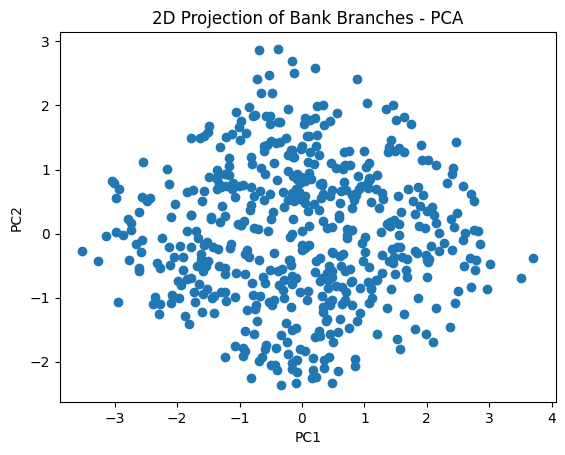

In [8]:
# PCA Visualization
plt.figure()
plt.scatter(data_set_scaled_pca[:,0], data_set_scaled_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Projection of Bank Branches - PCA')
plt.show()

## 3. K-Means Clustering Implementation

K-Means clustering was implemented from scratch using NumPy. Three clusters (k=3) were
chosen. Centroids were randomly initialized from the PCA-reduced dataset. Each data point was
assigned to the nearest centroid using Euclidean distance. Centroids were updated iteratively as
the mean of assigned points until convergence or until the maximum number of iterations was
reached.

In [9]:
# K-Means clustering implementation
np.random.seed(42)
k = 3
max_iters = 100

# Centriods are initialized randomly from the data points
indices = np.random.choice(len(data_set_scaled_pca), k, replace=False)
centroids = data_set_scaled_pca[indices]

for _ in range(max_iters):
    # calculate distances from centroids
    distances = np.linalg.norm(data_set_scaled_pca[:, np.newaxis] - centroids, axis=2)
    
    # cluster assignment
    labels = np.argmin(distances, axis=1)
    
    # Update centroids
    new_centroids = np.array([data_set_scaled_pca[labels == i].mean(axis=0) for i in range(k)])
    
    # check for convergence
    if np.allclose(centroids, new_centroids):
        break
        
    centroids = new_centroids

centroids

array([[ 1.31664621, -0.49826735],
       [-1.36298824, -0.64266249],
       [-0.07119564,  1.15133785]])

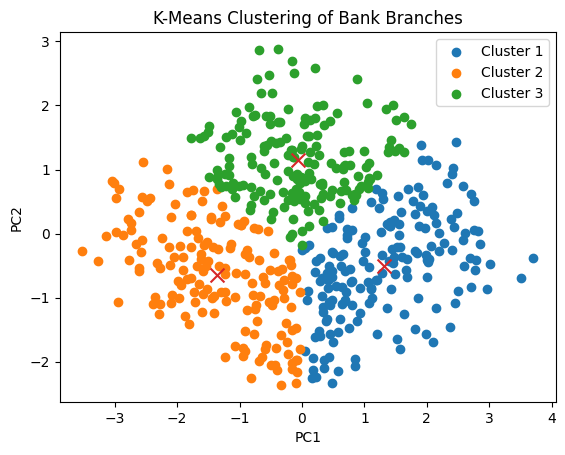

In [10]:
# Plot clusters
plt.figure()
for i in range(k):
    plt.scatter(data_set_scaled_pca[labels == i, 0], data_set_scaled_pca[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering of Bank Branches')
plt.legend()
plt.show()

## 4. Cluster Quality Evaluation

Cluster quality was evaluated using inertia, defined as the sum of squared distances between data
points and their nearest centroid. A lower inertia value indicates more compact and well-defined
clusters.

In [11]:
# Inertia calculation
inertia = 0
for i in range(k):
    inertia += np.sum((data_set_scaled_pca[labels == i] - centroids[i])**2)

inertia

np.float64(637.6411871253721)

## Interpretation & Insights

Cluster 1: High activity branches – high transactions, deposits, and customer traffic

Suggestion: Allocate more staff, prioritize digital support systems

Cluster 2: Medium-performing branches – balanced operations

Suggestion: Targeted marketing to increase customer engagement

Cluster 3: Low-activity branches – lower deposits and traffic

Suggestion: Cost optimization, localized promotions, or consolidation

The clustering results revealed three distinct groups of bank branches. High-activity branches
exhibit high customer traffic and transaction volumes and require greater staffing and infrastructure
support. Medium-performing branches show balanced operations and can benefit from targeted
marketing strategies. Low-activity branches display lower engagement and may require cost
optimization or localized promotional efforts.

## Conclusion

This analysis demonstrates how linear algebra and unsupervised machine learning techniques can
be effectively applied to real-world banking data. PCA simplifies complex datasets, while K-Means
clustering uncovers meaningful operational patterns. The insights obtained support data-driven
decision-making for improved banking operations.